In [34]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
sns.set()
%matplotlib inline

In [35]:
#Importing the data from my drive
# for negative reviews, and positive ones

all_data = pd.read_csv("./Dataset/reviews_imdb_dataset.csv",
                       header=None, 
                       names=['text','sentiment'],
                       encoding = "ISO-8859-1")
all_data

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [36]:
all_data['sentiment'] = all_data['sentiment'].map({'negative': 0, 'positive': 1})
all_data.head()

,text,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [37]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

# Clean reviews for sentiment analysis
def get_clean_words(words):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in words if w.lower() not in stopwords]

    # Removing punctuation
    words = [w.replace(r'[^\w\s]','') for w in words]
    words = [w.replace('(', '') for w in words]
    words = [w.replace(')', '') for w in words]
    words = [w.replace('?', '') for w in words]
    words = [w.replace(',', '') for w in words]
    words = [w.replace('.', '') for w in words]
    words = [w.replace('"', '') for w in words]
    words = [w.replace('!', '') for w in words]
    words = [w.replace(':', '') for w in words]
    words = [w.replace('&', '') for w in words]
    words = [w.replace('/', '') for w in words]
    words = [w.replace('[', '') for w in words]
    words = [w.replace(']', '') for w in words]
    words = [w.replace('<', '') for w in words]
    words = [w.replace('>', '') for w in words]
    words = [w.replace('=', '') for w in words]
    
    # Removing numbers
    words = [w for w in words if not _isnum(w)]
    
    # Removing links
    words = [w for w in words if 'http' not in w]
        
    # Removing hashtags
    words = [w for w in words if not w.startswith("#")]
    
    # Removing mentions
    words = [w for w in words if not w.startswith("@")]
    
    # Keeping words with more than 1 character
    words = [w for w in words if len(w) > 1]    
    w = " ".join(words)
    return w

#This Function was inspired from Mudium Post:https://towardsdatascience.com
#/analyzing-twitter-spheres-through-nlp-techniques-748b0df10b6c

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Funtion to pass each review into the clean words function and create a new list
def clean_reviews(df):
    new_text = []
    for i in range(len(df)):
        new_text.append(get_clean_words(df['text'].values[i].split()))
    all_data['Clean_Reviews'] = new_text
     

In [39]:
#visualizing the data after being cleaned 
clean_reviews(all_data)
all_data.head()

,text,sentiment,Clean_Reviews
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. The filming tec...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically there's family little boy jake think...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei's love time money visually stunn...


In [40]:
#Lemmatization

nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer
tokenized_review = all_data['Clean_Reviews'].apply(lambda x: x.split())
#tokenized_review.head()

wl = WordNetLemmatizer()
tokenized_review = tokenized_review.apply(lambda x: [wl.lemmatize(word=i, pos = wordnet.VERB) for i in x])
tokenized_review.head()    


[nltk_data] Downloading package wordnet to /home/rafael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [one, reviewers, mention, watch, oz, episode, ...
1    [wonderful, little, production, film, techniqu...
2    [think, wonderful, way, spend, time, hot, summ...
3    [basically, there's, family, little, boy, jake...
4    [petter, mattei's, love, time, money, visually...
Name: Clean_Reviews, dtype: object

In [41]:
for i in range(len(tokenized_review)):
    tokenized_review[i] = ' '.join(tokenized_review[i])
all_data['Clean_Reviews'] = tokenized_review
all_data.head()   


,text,sentiment,Clean_Reviews
0,One of the other reviewers has mentioned that ...,1,one reviewers mention watch oz episode hook ri...
1,A wonderful little production. The filming tec...,1,wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,1,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,0,basically there's family little boy jake think...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei's love time money visually stun ...


In [42]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import requests

In [43]:
model_data=all_data.sample(n = 50000)

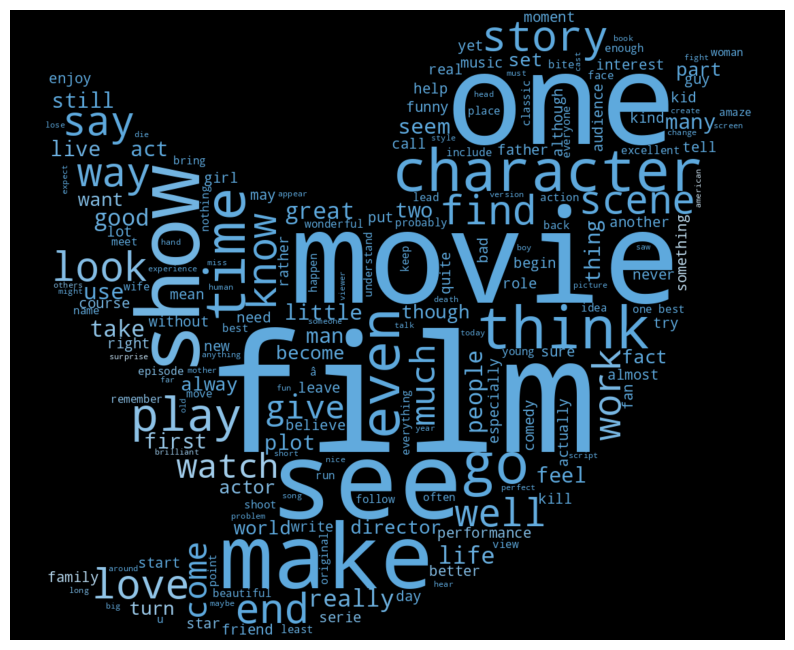

In [44]:
#One is all the positive words
all_words_positive = ' '.join(text for text in model_data['Clean_Reviews'][model_data['sentiment']==1])
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()
     


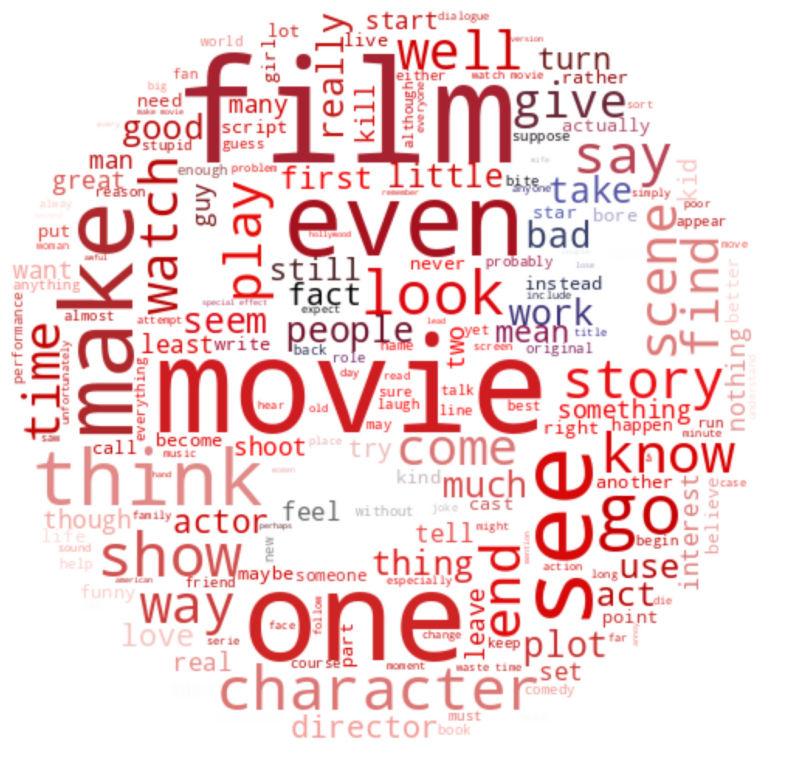

In [45]:
#Negative words:

all_words_negative = ' '.join(text for text in all_data['Clean_Reviews'][all_data['sentiment']==0])
Mask = np.array(Image.open(requests.get('http://clipart-library.com/data_images/362062.jpg', stream=True).raw))
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='white', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
rann = 2000
x_train,x_test,y_train,y_test=train_test_split(
    model_data['Clean_Reviews'],model_data['sentiment'],
    test_size=0.1,random_state=rann)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# A function to provide the metrics scores for various classifiers
# The function uses bag-of-words vectorization feature extraction
def model_features_scores(classifier,x,y,linear=False):
  results=[]
  results_acc=[]
  features_range=np.arange(1000,5001,1000)
  for num in features_range:
    #building bag of words
    bow_vectorizer= CountVectorizer(max_df=0.90, min_df=2, max_features=num,
                                    stop_words='english')
    # bag-of-words feature matrix
    bow = bow_vectorizer.fit_transform(x)

    #getting the train part of the data
    train_bow = bow
    train_bow.todense()
    x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(
        train_bow,y,test_size=0.1,random_state=200)

    classifier.fit(x_train_bow,y_train_bow)
    if linear:
      prediction_bow = classifier.predict(x_valid_bow)
      prediction_int = prediction_bow
    else:
      prediction_bow = classifier.predict_proba(x_valid_bow)
      prediction_int = prediction_bow[:,1]>=0.3


    # if prediction is greater than or equal to 0.3 then 1 else 0
    # Where 0 is for negative sentiment tweets and 1 for positive sentiment tweets

    prediction_int = prediction_int.astype(int)

    # calculating f1 score and accuracy
    score = f1_score(y_valid_bow, prediction_int)
    results.append(score)
    accuracy = accuracy_score(y_valid_bow, prediction_int)
    results_acc.append(accuracy)
  
  return results,results_acc

In [48]:
#Fitting different classification algorithms and getting accuracy and
#F-1 scores

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier
from sklearn import naive_bayes

Log_Reg = LogisticRegression(solver='liblinear',random_state=300)
Log_bow_scores,Log_bow_accuracy=model_features_scores(Log_Reg,x_train,y_train)

XGB_model= XGBClassifier(learning_rate=0.9,random_state=300)
XGB_bow_scores,XGB_bow_accuracy=model_features_scores(XGB_model,x_train,y_train)

DT_model = DecisionTreeClassifier(criterion='entropy', random_state=300)
DT_bow_scores,DT_bow_accuracy=model_features_scores(DT_model,x_train,y_train)

SVC_Reg=LinearSVC(max_iter=3000,random_state=300)
SVC_bow_scores,SVC_bow_accuracy=model_features_scores(SVC_Reg,x_train,y_train,linear=True)

Ridge_Reg=RidgeClassifier(random_state=300)
Ridge_bow_scores,Ridge_bow_accuracy=model_features_scores(Ridge_Reg,x_train,y_train,linear=True)

#Multinobial Naive Bayes classifier
NB_model = naive_bayes.MultinomialNB()
NB_bow_scores,NB_bow_accuracy=model_features_scores(NB_model,x_train,y_train)

/home/rafael/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/rafael/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/rafael/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/rafael/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/rafael/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of

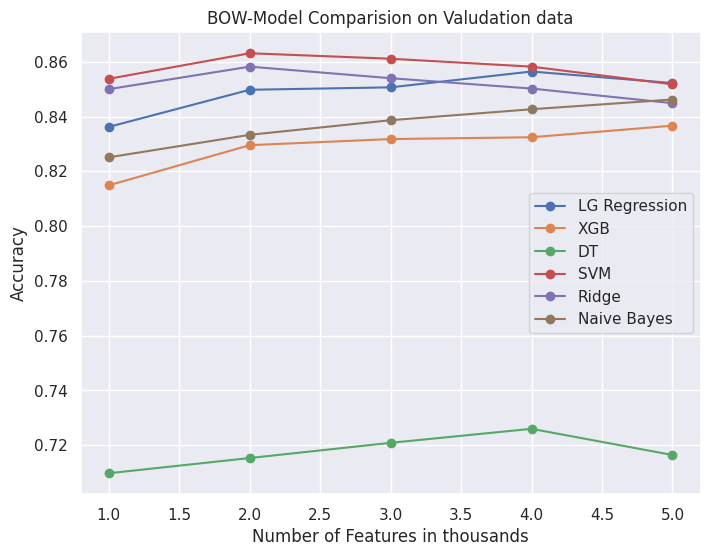

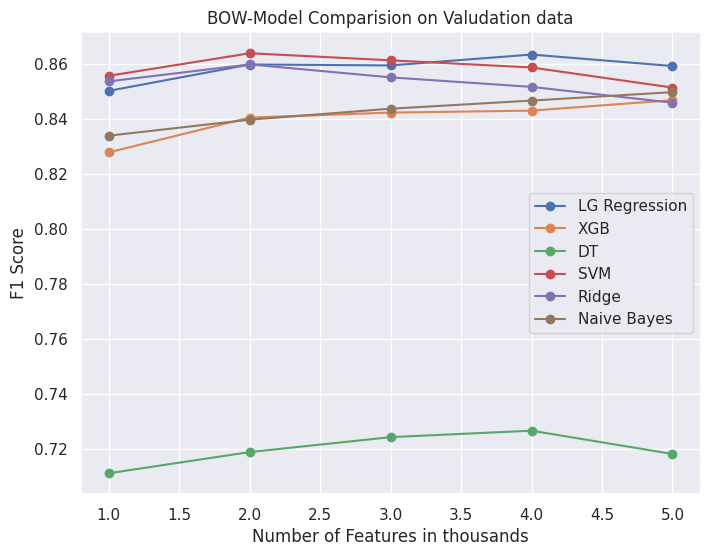

In [49]:
#Plotting different classification models performances
#over the bag of words features 

plt.figure(figsize=(8, 6))
plt.plot([*range(1,6,1)] ,Log_bow_accuracy,'o-',label='LG Regression')
plt.plot([*range(1,6,1)] ,XGB_bow_accuracy,'o-',label='XGB')
plt.plot([*range(1,6,1)] ,DT_bow_accuracy,'o-',label='DT')
plt.plot([*range(1,6,1)] ,SVC_bow_accuracy,'o-',label='SVM')
plt.plot([*range(1,6,1)] ,Ridge_bow_accuracy,'o-',label='Ridge')
plt.plot([*range(1,6,1)] ,NB_bow_accuracy,'o-',label='Naive Bayes')


plt.title("BOW-Model Comparision on Valudation data")
plt.xlabel("Number of Features in thousands")
plt.ylabel("Accuracy")
plt.legend()
plt.show

##################


plt.figure(figsize=(8, 6))

plt.plot([*range(1,6,1)] ,Log_bow_scores,'o-',label='LG Regression')
plt.plot([*range(1,6,1)] ,XGB_bow_scores,'o-',label='XGB')
plt.plot([*range(1,6,1)] ,DT_bow_scores,'o-',label='DT')
plt.plot([*range(1,6,1)] ,SVC_bow_scores,'o-',label='SVM')
plt.plot([*range(1,6,1)] ,Ridge_bow_scores,'o-',label='Ridge')
plt.plot([*range(1,6,1)] ,NB_bow_scores,'o-',label='Naive Bayes')


plt.title("BOW-Model Comparision on Valudation data")
plt.xlabel("Number of Features in thousands")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
# A function to provide the metrics scores for various classifiers
# The function uses TF-IDF vectorization feature extraction

def model_tfidf_features_scores(classifier,x,y,linear=False):
  results=[]
  results_acc=[]
  features_range=np.arange(1000,5001,1000)
  for num in features_range:
    #building tfidf matrix
    tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=num,stop_words='english')
    train_tfidf_matrix=tfidf.fit_transform(x)

    #getting the train part of the data
    #train_tfidf_matrix = tfidf_matrix
    train_tfidf_matrix.todense()
    x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf= train_test_split(
        train_tfidf_matrix,y,test_size=0.1,random_state=200)

    classifier.fit(x_train_tfidf,y_train_tfidf)
    if linear:
      prediction_tfidf = classifier.predict(x_valid_tfidf)
      prediction_int = prediction_tfidf
    else:
      prediction_tfidf = classifier.predict_proba(x_valid_tfidf)
      prediction_int = prediction_tfidf[:,1]>=0.3

    prediction_int = prediction_int.astype(int)

    # calculating f1 score and accuracy
    score = f1_score(y_valid_tfidf, prediction_int)
    results.append(score)
    accuracy = accuracy_score(y_valid_tfidf, prediction_int)
    results_acc.append(accuracy)
  
  return results,results_acc
     


In [51]:


#Fitting different classification algorithms and getting accuracy and 
#F-1 scores

Log_Reg = LogisticRegression(solver='liblinear')
Log_tfidf_scores,Log_tfidf_accuracy=model_tfidf_features_scores(Log_Reg,x_train,y_train)

XGB_model= XGBClassifier(learning_rate=0.9)
XGB_tfidf_scores,XGB_tfidf_accuracy=model_tfidf_features_scores(XGB_model,x_train,y_train)

DT_model = DecisionTreeClassifier(criterion='entropy')
DT_tfidf_scores,DT_tfidf_accuracy=model_tfidf_features_scores(DT_model,x_train,y_train)

SVC_Reg=LinearSVC(max_iter=2000,random_state=200)
SVC_tfidf_scores,SVC_tfidf_accuracy=model_tfidf_features_scores(SVC_Reg,x_train,y_train,linear=True)

Ridge_Reg=RidgeClassifier(random_state=200)
Ridge_tfidf_scores,Ridge_tfidf_accuracy=model_tfidf_features_scores(Ridge_Reg,x_train,y_train,linear=True)

#Naive Bayes Classifier
NB_model = naive_bayes.MultinomialNB()
NB_tfidf_scores,NB_tfidf_accuracy=model_tfidf_features_scores(NB_model,x_train,y_train)
     


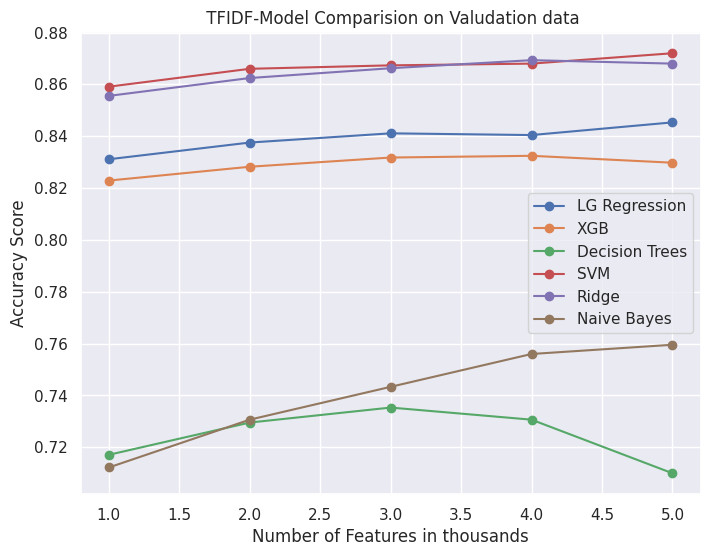

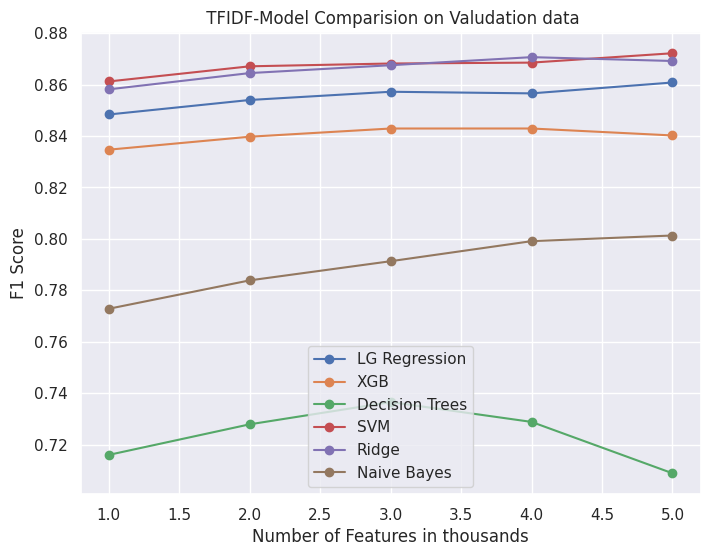

In [52]:
#Plotting different classification models performances
#over the bag of words features 

plt.figure(figsize=(8, 6))

plt.plot([*range(1,6,1)] ,Log_tfidf_accuracy,'o-',label='LG Regression')
plt.plot([*range(1,6,1)] ,XGB_tfidf_accuracy,'o-',label='XGB')
plt.plot([*range(1,6,1)] ,DT_tfidf_accuracy,'o-',label='Decision Trees')
plt.plot([*range(1,6,1)] ,SVC_tfidf_accuracy,'o-',label='SVM')
plt.plot([*range(1,6,1)] ,Ridge_tfidf_accuracy,'o-',label='Ridge')
plt.plot([*range(1,6,1)] ,NB_tfidf_accuracy,'o-',label='Naive Bayes')

plt.title(" TFIDF-Model Comparision on Valudation data")
plt.xlabel("Number of Features in thousands")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

############################
plt.figure(figsize=(8, 6))


plt.plot([*range(1,6,1)] ,Log_tfidf_scores,'o-',label='LG Regression')
plt.plot([*range(1,6,1)] ,XGB_tfidf_scores,'o-',label='XGB')
plt.plot([*range(1,6,1)] ,DT_tfidf_scores,'o-',label='Decision Trees')
plt.plot([*range(1,6,1)] ,SVC_tfidf_scores,'o-',label='SVM')
plt.plot([*range(1,6,1)] ,Ridge_tfidf_scores,'o-',label='Ridge')
plt.plot([*range(1,6,1)] ,NB_tfidf_scores,'o-',label='Naive Bayes')

plt.title(" TFIDF-Model Comparision on Valudation data")
plt.xlabel("Number of Features in thousands")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


In [53]:
results = {
    'LG Regression':[max(Log_bow_accuracy), max(Log_tfidf_accuracy)],
    'SVM':[max(SVC_bow_accuracy), max(SVC_tfidf_accuracy)],
    'Ridge':[max(Ridge_bow_accuracy),max(Ridge_tfidf_accuracy)],
    'XGB':[max(XGB_bow_accuracy), max(XGB_tfidf_accuracy)],
    'Decision Trees':[max(DT_bow_accuracy), max(DT_tfidf_accuracy)],
    'Naive Bayes':[max(NB_bow_accuracy), max(NB_tfidf_scores)]

}
pd.DataFrame(results, index=['Bag-of-words Accuracy', 'TF-IDF Accuracy']).round(3)

,LG Regression,SVM,Ridge,XGB,Decision Trees,Naive Bayes
Bag-of-words Accuracy,0.856,0.863,0.858,0.837,0.726,0.846
TF-IDF Accuracy,0.845,0.872,0.869,0.832,0.735,0.801


In [54]:


# A summary of the model comparision plots
results = {
    'LG Regression':[max(Log_bow_scores), max(Log_tfidf_scores)],
    'SVM':[max(SVC_bow_scores), max(SVC_tfidf_scores)],
    'Ridge':[max(Ridge_bow_scores),max(Ridge_tfidf_scores)],
    'XGB':[max(XGB_bow_scores), max(XGB_tfidf_scores)],
    'Decision Trees':[max(DT_bow_scores), max(DT_tfidf_scores)],
    'Naive Bayes':[max(NB_bow_scores), max(NB_tfidf_scores)]

}
pd.DataFrame(results, index=['Bag-of-words F-1 Score', 'TF-IDF F-1 Score']).round(3)
     


,LG Regression,SVM,Ridge,XGB,Decision Trees,Naive Bayes
Bag-of-words F-1 Score,0.863,0.864,0.860,0.847,0.727,0.850
TF-IDF F-1 Score,0.861,0.872,0.871,0.843,0.737,0.801
